In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [55]:
class Camera:
    def __init__(self):
        self.mtx = None
        self.ret = None
        self.dist = None
        
    def chessboard_corners(self, img, dims=(9,6)):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, dims, None)
        return ret, corners

    def calibrate(self, images, dims=(9,6)):
        img_points = []
        for image in images:
            ret, corners = self.chessboard_corners(image)
            if (ret):
                img_points.append(corners)
        
        objP = np.zeros((np.prod(dims), 3), np.float32)
        objP[:,:2] = np.mgrid[0:dims[0], 0:dims[1]].T.reshape(-1,2)
        obj_points = [objP] * len(img_points)
        if (len(img_points) > 0):
            img_shape = images[0].shape[:2]
            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_shape, None, None)
            if (ret):
                self.ret = ret
                self.mtx = mtx
                self.dist = dist
                return mtx, dist
        return None, None
    
    def undistort(self, img):
        return cv2.undistort(img, self.mtx, self.dist, None, self.mtx)
        

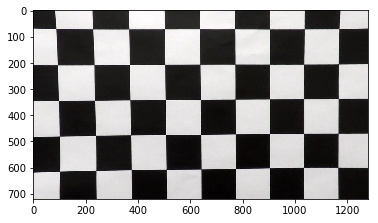

In [59]:
def load_camera_calibration_images(folder='camera_cal'):
    camera_files = os.listdir(folder)
    paths = list(map(lambda f: os.path.join(folder,f), camera_files))
    cal_images = [mpimg.imread(path) for path in paths] 
    return cal_images



images = load_camera_calibration_images()
camera = Camera()
mtx, dist = camera.calibrate(images[0])
undistort_images = [camera.undistort(img) for img in images]
plt.imshow(undistort_images[0])

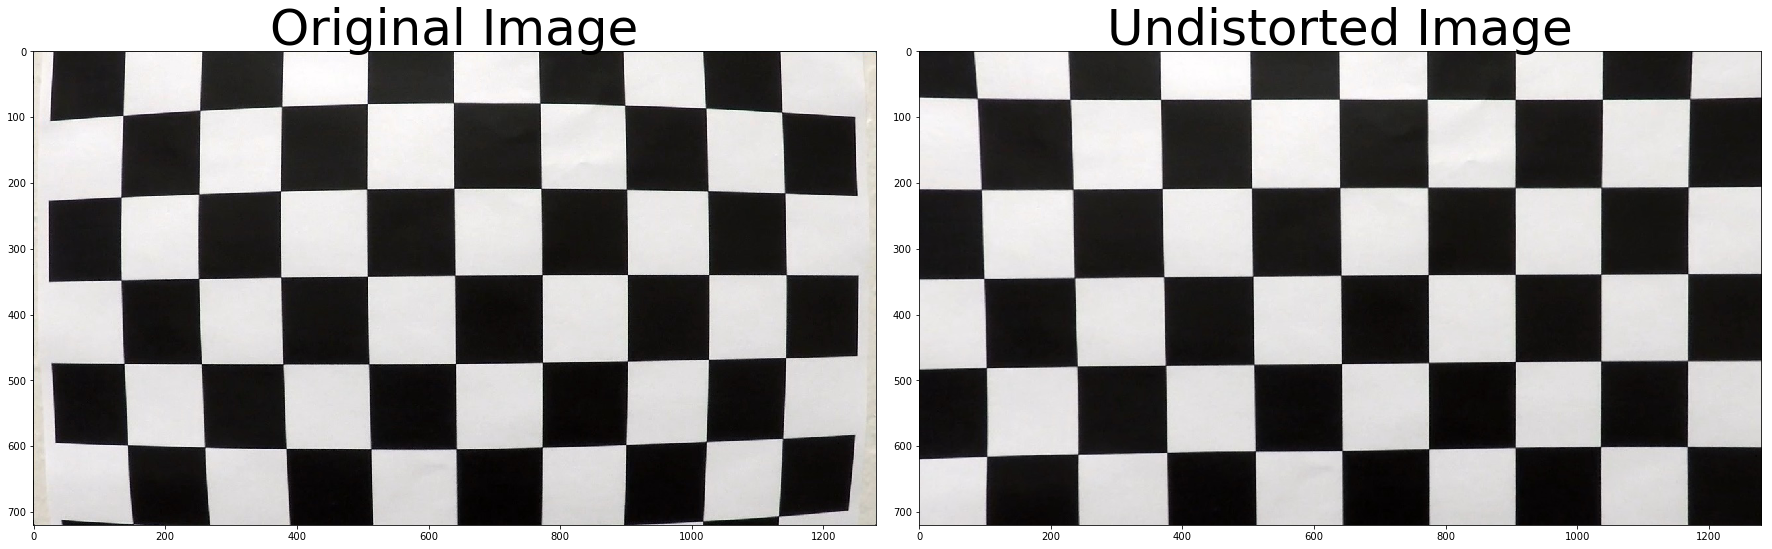

In [60]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(images[0])
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistort_images[0])
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)